# **EDA Notebook**



---
## 0. Setup Environment

In [1]:
# DO NOT MODIFY THE CODE IN THIS CELL
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT3",
)
at.run()

import warnings
warnings.simplefilter(action='ignore')


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



You can now save your data files in: c:\Users\brohao\Desktop\UTS\36106\ClassificationAnalysis-36106-GroupAssignment\36106\assignment\AT3\data


---
## Student Information

In [2]:
# <Student to fill this section>
group_name = "12"
student_name = "Jiayu Hao"
student_id = "25948860"

In [3]:
# Do not modify this code
print_tile(size="h1", key='group_name', value=group_name)

In [4]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## 0. Python Packages

### 0.a Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [ ]:
# <Student to fill this section>

### 0.b Import Packages

In [6]:
# <Student to fill this section>
import pandas as pd
import altair as alt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re

---
## B. Data Understanding

In [8]:
# Do not modify this code
try:
  df = pd.read_csv(at.folder_path / "products.csv")
except Exception as e:
  print(e)

### B.1 Explore Dataset

In [9]:
print("Shape of dataset:", df.shape)   # rows * columns

# Overview of data types and non-null counts
print("\nDataset Info:")
print(df.info())

# First few rows
print("\nFirst 5 rows of testing set:")
pd.set_option("display.max_columns", None)
display(df.head())

# Summary statistics for numerical features
print("\nSummary statistics for numerical variables:")
display(df.describe().T)

# Summary for categorical features
print("\nUnique values count for categorical variables:")
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Shape of dataset: (514, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              514 non-null    int64  
 1   product_id              514 non-null    int64  
 2   product_subcategory_id  514 non-null    int64  
 3   product_sku             514 non-null    object 
 4   product_name            514 non-null    object 
 5   model_name              514 non-null    object 
 6   product_description     514 non-null    object 
 7   product_colour          428 non-null    object 
 8   product_size            371 non-null    object 
 9   product_style           514 non-null    object 
 10  product_cost            440 non-null    float64
 11  product_price           450 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 48.3+ KB
None

First 5 rows of testing set:


,Unnamed: 0,product_id,product_subcategory_id,product_sku,product_name,model_name,product_description,product_colour,product_size,product_style,product_cost,product_price
0,0,318,2,BK-R68R-48,"Road-450 Red, 48",Road-450,A true multi-sport bike that offers streamline...,Red,48,U,NaN,1457.9900
1,1,532,12,FR-M21B-44,"LL Mountain Frame - Black, 44",LL Mountain Frame,"Our best value utilizing the same, ground-brea...",Black,44,U,136.7850,249.7900
2,2,238,14,FR-R92R-62,"HL Road Frame - Red, 62",HL Road Frame,Our lightest and best quality aluminum frame m...,Red,62,U,747.9682,1263.4598
3,3,293,12,FR-M94S-46,"HL Mountain Frame - Silver, 46",HL Mountain Frame,Each frame is hand-crafted in our Bothell faci...,Silver,46,U,623.8403,1204.3248
4,4,377,2,BK-R89B-52,"Road-250 Black, 52",Road-250,"Alluminum-alloy frame provides a light, stiff ...",Black,52,U,1320.6838,2181.5625



Summary statistics for numerical variables:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,514.0,256.500000,148.523287,0.0000,128.2500,256.5000,384.75000,513.0000
product_id,514.0,440.443580,108.278995,214.0000,346.0000,454.5000,533.00000,606.0000
product_subcategory_id,514.0,12.620623,10.196034,1.0000,2.0000,12.5000,17.00000,37.0000
product_cost,440.0,396.875115,516.258756,0.8565,35.9596,185.8193,495.69245,2171.2942
product_price,450.0,648.290433,821.780613,2.2900,65.1225,306.5636,1000.43750,3578.2700



Unique values count for categorical variables:
product_sku: 293 unique values
product_name: 293 unique values
model_name: 119 unique values
product_description: 115 unique values
product_colour: 9 unique values
product_size: 19 unique values
product_style: 4 unique values


In [10]:
# Missing values
print("\nMissing values per column:")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)

# Duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing values per column:


product_size      143
product_colour     86
product_cost       74
product_price      64
dtype: int64


Number of duplicate rows: 0


In [11]:
print("nunique product_id:", df['product_id'].nunique(), "/", len(df))
print("nunique product_sku:", df['product_sku'].nunique())
name_to_ids = (df.groupby('product_name')['product_id']
                 .nunique().sort_values(ascending=False).head(10))
display(name_to_ids.to_frame('unique_product_ids_per_name'))

nunique product_id: 293 / 514
nunique product_sku: 293


,unique_product_ids_per_name
product_name,
AWC Logo Cap,1
All-Purpose Bike Stand,1
Bike Wash - Dissolver,1
Cable Lock,1
Chain,1
"Classic Vest, L",1
"Classic Vest, M",1
"Classic Vest, S",1
Fender Set - Mountain,1


In [12]:
redundant = [c for c in df.columns if c.lower().startswith('unnamed')]
print("Redundant/index-like columns:", redundant)

Redundant/index-like columns: ['Unnamed: 0']


In [13]:
rule_nonneg_cost = (df['product_cost'].dropna() >= 0).all()
rule_nonneg_price = (df['product_price'].dropna() >= 0).all()
violations = df.loc[df['product_cost'].notna() & df['product_price'].notna()
                    & (df['product_cost'] > df['product_price']),
                    ['product_id','product_sku','product_cost','product_price']]
print("Non-negative checks:", rule_nonneg_cost, rule_nonneg_price)
print("Cost > Price violations:", len(violations), "rows")
display(violations.head(5))

Non-negative checks: True True
Cost > Price violations: 0 rows


,product_id,product_sku,product_cost,product_price


In [14]:
for col in ['product_size','product_colour','product_cost','product_price']:
    miss_by_group = (df.assign(missing=df[col].isna())
                       .groupby(['product_subcategory_id','product_style'])['missing']
                       .mean().reset_index()
                       .sort_values('missing', ascending=False))
    print(f"Missing pattern for {col} (top groups):")
    display(miss_by_group.head(10))

Missing pattern for product_size (top groups):


,product_subcategory_id,product_style,missing
35,31,0,1.000000
21,18,M,0.750000
41,37,0,0.608696
12,11,0,0.600000
3,2,W,0.600000
27,23,U,0.571429
18,15,0,0.538462
40,36,0,0.500000
1,1,W,0.500000
20,17,0,0.454545


Missing pattern for product_colour (top groups):


,product_subcategory_id,product_style,missing
6,5,0,1.0
5,4,0,1.0
41,37,0,1.0
32,28,0,1.0
31,27,0,1.0
30,26,0,1.0
38,34,0,1.0
18,15,0,1.0
12,11,0,1.0
11,10,0,1.0


Missing pattern for product_cost (top groups):


,product_subcategory_id,product_style,missing
38,34,0,1.000000
39,35,0,1.000000
37,33,0,0.857143
27,23,U,0.571429
14,12,W,0.500000
41,37,0,0.478261
6,5,0,0.428571
0,1,U,0.224138
1,1,W,0.166667
16,14,U,0.157895


Missing pattern for product_price (top groups):


,product_subcategory_id,product_style,missing
12,11,0,0.600000
40,36,0,0.500000
6,5,0,0.428571
37,33,0,0.428571
0,1,U,0.379310
13,12,U,0.224490
24,21,U,0.214286
28,24,W,0.200000
1,1,W,0.166667
41,37,0,0.130435


In [15]:
def norm_str(s):
    if pd.isna(s): return s
    return str(s).strip().title()

for c in ['product_colour','product_size','product_style','model_name','product_name']:
    nunique_raw = df[c].nunique(dropna=True)
    nunique_norm = df[c].map(norm_str).nunique(dropna=True)
    print(f"{c}: raw={nunique_raw} vs normalized={nunique_norm}")

product_colour: raw=9 vs normalized=9
product_size: raw=19 vs normalized=19
product_style: raw=4 vs normalized=4
model_name: raw=119 vs normalized=119
product_name: raw=293 vs normalized=293


In [ ]:
def extract_two_digit(x):
    m = re.search(r'(\d{2})\b', str(x))
    return m.group(1) if m else None

tmp = df[['product_name','product_size']].copy()
tmp['size_from_name'] = tmp['product_name'].apply(extract_two_digit)
tmp = tmp.dropna(subset=['product_size','size_from_name'])
consistency_rate = (tmp['product_size'].astype(str) == tmp['size_from_name'].astype(str)).mean()
print("Name vs product_size consistency (approx.):", round(consistency_rate, 3))

Name vs product_size consistency (approx.): 0.483


In [19]:
# provide a detailed analysis on the dataset, its dimensions, information, issues, ...
dataset_insights = """
The products.csv dataset contains 514 records and 12 columns, providing 
detailed information about each product, including identifiers, categories, 
descriptions, colour, size, cost, and price. Among these variables, seven 
are categorical and five are numeric. There are 293 unique product_id and 
product_sku values, indicating that some products appear multiple times in 
the dataset—most likely representing different colour or size variants 
rather than true duplicates. A redundant index column (Unnamed: 0) is 
present and should be removed during data cleaning.

The dataset shows good data validity: all prices and costs are non-negative, 
and no instances were found where the product cost exceeded its price. 
Missing data are observed in product_size (27.8%), product_colour (16.7%), 
product_cost (14.4%), and product_price (12.5%), but these missing values 
are largely structural, meaning they occur mainly in product categories 
where such attributes do not apply (e.g., accessories without size or 
colour). Therefore, they should be treated as Not Applicable rather than 
imputed. Text fields such as colour and style are already well-standardised, 
showing no duplicate categories after normalisation.

Finally, around 48% of the product_size values match the size information 
embedded in product_name, suggesting moderate inconsistency between 
text-based and structured size attributes. This inconsistency should be 
standardised in the preparation phase to ensure consistent feature 
generation across datasets. Overall, the dataset is clean, well-structured, 
and suitable for integration with sales and customer data in subsequent 
analysis.

"""

In [20]:
# Do not modify this code
print_tile(size="h3", key='dataset_insights', value=dataset_insights)

### B.2 Explore Feature of Interest `product_price`

In [42]:
feat_name = 'product_price'

count     450.000000
mean      648.290433
std       821.780613
min         2.290000
25%        65.122500
50%       306.563600
75%      1000.437500
max      3578.270000
Name: product_price, dtype: float64

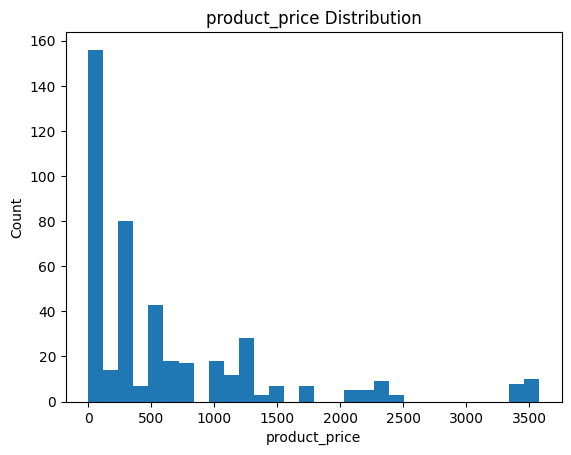

In [23]:
# Basic statistics
display(df[feat_name].describe().T)

# Distribution plots
plt.hist(df[feat_name].dropna(), bins=30)
plt.title(f"{feat_name} Distribution")
plt.xlabel(feat_name); plt.ylabel("Count")
plt.show()

count    450.000000
mean       5.537563
std        1.595593
min        0.828552
25%        4.175368
50%        5.725425
75%        6.908193
max        8.182635
Name: log_price, dtype: float64


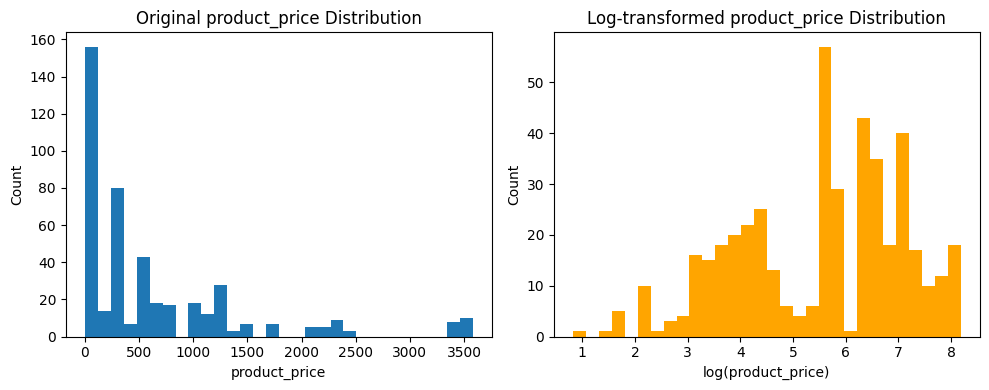

In [43]:
# 仅保留非缺失、正值价格
price_log = []
price_log = df[feat_name].dropna()
price_log = price_log[price_log > 0]

# 对数转换
df['log_price'] = np.log(price_log)

# 描述统计
print(df['log_price'].describe())

# 绘制分布对比
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(price_log, bins=30)
axes[0].set_title("Original product_price Distribution")
axes[0].set_xlabel("product_price")
axes[0].set_ylabel("Count")

axes[1].hist(df['log_price'].dropna(), bins=30, color='orange')
axes[1].set_title("Log-transformed product_price Distribution")
axes[1].set_xlabel("log(product_price)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [44]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
feature_1_insights = """
product_price has 450 valid entries ranging from 2.29 to 3578.27, with a 
mean of 648.29 and a median of 306.56. The distribution is strongly 
right-skewed, with most products priced below $500 and a few high-value 
items forming a long tail. About 12.5% of values are missing, mainly for 
items without finalized prices. The feature shows large variation and 
outliers, so scaling or log transformation is recommended before modeling. 
Overall, prices are reasonable and indicate a catalogue dominated by 
low- to mid-priced products. The logarithmic transformation is effective 
— it stabilizes variance, normalizes skewness, and makes the feature more 
suitable for modeling and correlation analysis.
"""

In [45]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### B.3 Explore Feature of Interest `product_cost`

In [48]:
feat_name = 'product_cost'

count     440.000000
mean      396.875115
std       516.258756
min         0.856500
25%        35.959600
50%       185.819300
75%       495.692450
max      2171.294200
Name: product_cost, dtype: float64

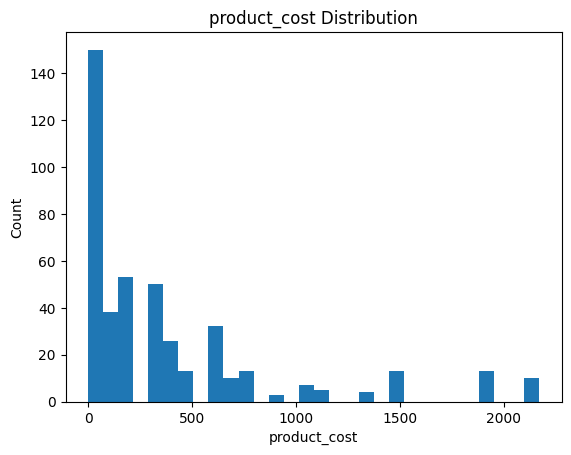

In [49]:
# Basic statistics
display(df[feat_name].describe().T)

# Distribution plots
plt.hist(df[feat_name].dropna(), bins=30)
plt.title(f"{feat_name} Distribution")
plt.xlabel(feat_name); plt.ylabel("Count")
plt.show()

count    440.000000
mean       4.976499
std        1.678677
min       -0.154901
25%        3.582396
50%        5.224775
75%        6.199351
max        7.683079
Name: log_price, dtype: float64


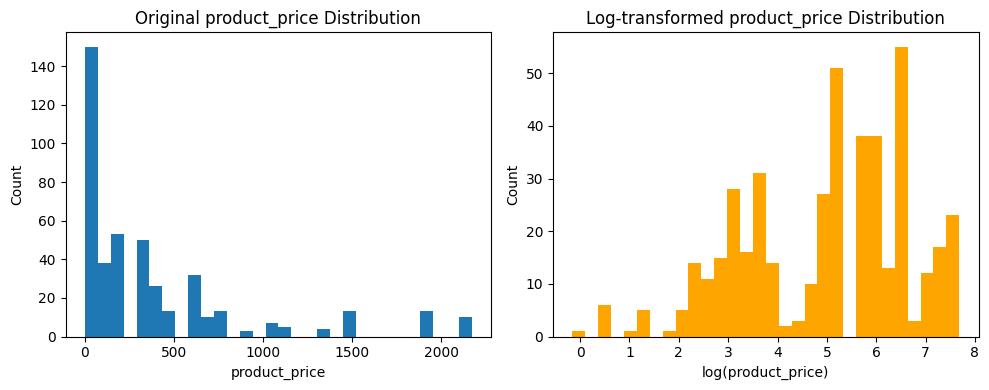

In [47]:
# 仅保留非缺失、正值价格
price_log = []
price_log = df[feat_name].dropna()
price_log = price_log[price_log > 0]

# 对数转换
df['log_price'] = np.log(price_log)

# 描述统计
print(df['log_price'].describe())

# 绘制分布对比
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(price_log, bins=30)
axes[0].set_title("Original product_price Distribution")
axes[0].set_xlabel("product_price")
axes[0].set_ylabel("Count")

axes[1].hist(df['log_price'].dropna(), bins=30, color='orange')
axes[1].set_title("Log-transformed product_price Distribution")
axes[1].set_xlabel("log(product_price)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [50]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_2_insights = """
product_cost has 440 valid entries ranging from 0.86 to 2171.29, with a 
mean of $396.88 and a median of $185.82. The distribution is strongly 
right-skewed, similar to product_price, indicating that most products are 
low-cost items, while a few high-value goods have much higher production 
or procurement costs. About 14.4% of records are missing, mostly 
corresponding to non-retail or accessory products. Costs are all positive 
and consistent with prices (no cost > price). The large variance suggests 
using scaling or a log transformation before modeling to stabilize spread. 
Overall, cost data are valid and reflect realistic product-level cost 
structures. The logarithmic transformation is effective for stabilizing 
variance and normalizing the distribution for product_cost.
"""

In [51]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### B.4 Explore Feature of Interest `'margin_rate'`

In [26]:
df_margin = df.dropna(subset=['product_cost', 'product_price']).copy()

In [27]:
df_margin['margin_rate'] = (df_margin['product_price'] - df_margin['product_cost']) / df_margin['product_price']
display(df_margin['margin_rate'].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

count    397.000000
mean       0.472941
std        0.089972
min        0.230000
1%         0.230000
5%         0.363600
25%        0.400600
50%        0.452400
75%        0.556000
95%        0.625999
99%        0.626661
max        0.642500
Name: margin_rate, dtype: float64

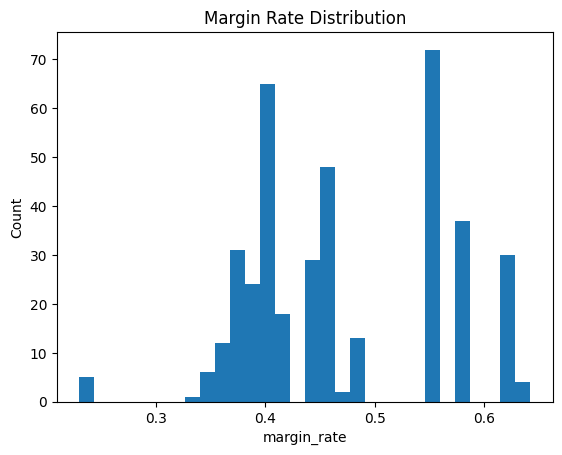

In [28]:
plt.hist(df_margin['margin_rate'].clip(0,1), bins=30)
plt.title("Margin Rate Distribution")
plt.xlabel("margin_rate"); plt.ylabel("Count")
plt.show()

In [52]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_3_insights = """
margin_rate has 397 valid values, ranging from 0.23 to 0.64, with a mean 
of 0.47 and a median of 0.45. The distribution is roughly unimodal and 
moderately right-skewed, indicating that most products achieve a margin 
between 40–55%. Extreme values are rare, and all margins fall within the 
valid range (0–1), confirming consistent cost–price relationships. The 
feature shows stable variability (std ≈ 0.09), making it a reliable 
indicator of product profitability. Missing values correspond to records 
lacking cost or price. Overall, margin_rate is clean and interpretable, 
suitable for use in profitability or customer value modeling.
"""

In [54]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

### B.5 Explore Feature of Interest `product_size`

In [32]:
feat_name = 'product_size'

product_size
NaN    143
0       86
44      45
48      41
52      20
60      20
42      19
L       18
38      16
46      16
Name: count, dtype: int64

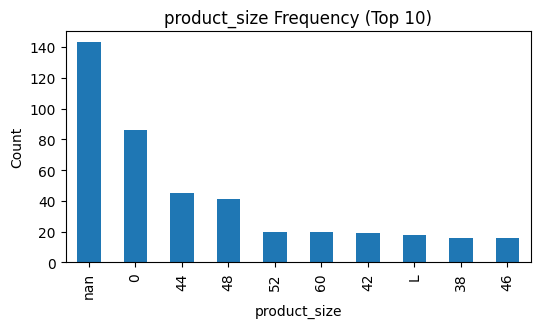

In [33]:
counts = df[feat_name].value_counts(dropna=False)
display(counts.head(10))
counts.head(10).plot(kind='bar', title=f"{feat_name} Frequency (Top 10)", figsize=(6,3))
plt.ylabel("Count")
plt.show()

In [55]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_4_insights = """
product_size contains 19 unique values, with 27.8% missing (143 out of 514). 
The most common entries are 0, 44, and 48, corresponding to common bike 
frame or clothing sizes. The distribution is highly imbalanced, dominated 
by a few numeric values, and includes mixed formats (numbers and letters 
such as “L”). The missing values are structural, mainly for accessories or 
products without physical size attributes, and should be treated as Not 
Applicable rather than imputed.
Overall, this feature provides limited predictive power on its own but 
can be standardized and used in combination with product categories to 
capture product variation.
"""

In [56]:
# Do not modify this code
print_tile(size="h3", key='feature_4_insights', value=feature_4_insights)

### B.6 Explore Feature of Interest `product_colour`

In [34]:
feat_name = 'product_colour'

product_colour
Black           156
NaN              86
Silver           78
Red              62
Yellow           59
Blue             36
Multi            15
Silver/Black     12
White             7
Grey              3
Name: count, dtype: int64

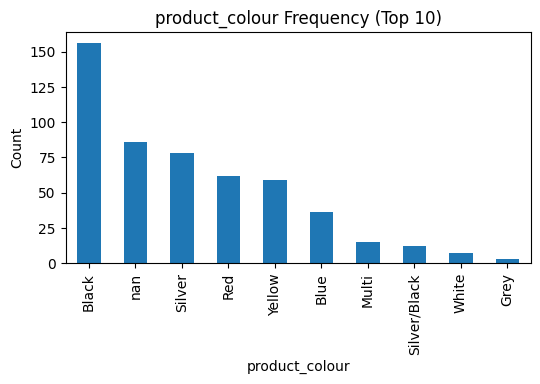

In [35]:
counts = df[feat_name].value_counts(dropna=False)
display(counts.head(10))
counts.head(10).plot(kind='bar', title=f"{feat_name} Frequency (Top 10)", figsize=(6,3))
plt.ylabel("Count")
plt.show()

In [57]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_5_insights = """
product_colour includes 9 unique values, with 16.7% missing (86 out of 514). 
The most frequent colours are Black (156), Silver (78), Red (62), and 
Yellow (59), together covering over 70% of valid entries. The distribution 
is moderately imbalanced but consistent with typical retail product 
palettes. Missing values are structural, mainly from non-colour items such 
as tools or accessories, and should be treated as Not Applicable. 
Overall, colour data are clean and interpretable, suitable for categorical 
encoding or use in clustering-style features reflecting product diversity.
"""

In [58]:
# Do not modify this code
print_tile(size="h3", key='feature_5_insights', value=feature_5_insights)

### B.7 Explore Feature of Interest `product_style`

In [36]:
feat_name = 'product_style'

product_style
U    314
0    139
W     44
M     17
Name: count, dtype: int64

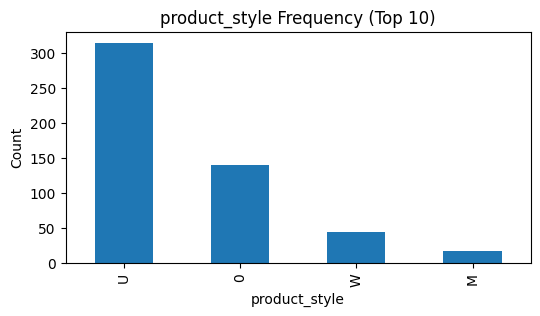

In [37]:
counts = df[feat_name].value_counts(dropna=False)
display(counts.head(10))
counts.head(10).plot(kind='bar', title=f"{feat_name} Frequency (Top 10)", figsize=(6,3))
plt.ylabel("Count")
plt.show()

In [59]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_6_insights = """
product_style contains 4 distinct categories, with ‘U’ (Unisex) being the 
most common (314 records), followed by ‘0’ (unspecified) with 139, 
‘W’ (Women) with 44, and ‘M’ (Men) with 17. The distribution is clearly 
imbalanced, dominated by unisex products. 
The presence of “0” indicates missing or undefined style values that should 
be standardized or grouped as Unknown during preparation.
This feature is useful for segmenting product lines and may help explain 
structural missingness in product_size and product_colour.
It provides business insight but must be treated cautiously in modeling to 
prevent bias or ethical issues related to gender representation.
"""

In [60]:
# Do not modify this code
print_tile(size="h3", key='feature_6_insights', value=feature_6_insights)